In [1]:
!git clone https://github.com/Srijha09/Prediction-of-Energy-Consumption.git

Cloning into 'Prediction-of-Energy-Consumption'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Receiving objects: 100% (24/24), 9.59 MiB | 12.26 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [1]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Attention

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%matplotlib inline
import requests
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
import matplotlib
import holidays

In [5]:
for date, name in sorted(holidays.IND(state='TN', years=2018).items()):
  print(date, name)

2018-01-14 Makar Sankranti / Pongal
2018-01-26 Republic Day
2018-03-02 Holi
2018-03-25 Palm Sunday
2018-03-30 Good Friday
2018-04-01 Easter Sunday
2018-04-14 Dr. B. R. Ambedkar's Jayanti; Puthandu (Tamil New Year)
2018-04-15 Puthandu (Tamil New Year)
2018-05-01 Labour Day
2018-05-20 Feast of Pentecost
2018-06-15 Eid ul-Fitr (estimated)
2018-06-16 Eid ul-Fitr (estimated)
2018-08-15 Independence Day
2018-08-21 Eid al-Adha (estimated)
2018-08-22 Eid al-Adha (estimated)
2018-09-20 Day of Ashura (estimated)
2018-10-02 Gandhi Jayanti
2018-11-07 Diwali
2018-11-20 Mawlid (estimated)
2018-12-25 Christmas Day


In [6]:
dailyEnergy = pd.read_excel('/content/Prediction-of-Energy-Consumption/dailyEnergyWithFeatures.xlsx')
dailyEnergy['weekday'] = dailyEnergy['TimeReviewed'].dt.dayofweek
dailyEnergy['day_type'] = np.zeros(len(dailyEnergy))
dailyEnergy['day_type'][(dailyEnergy['weekday']==5)|(dailyEnergy['weekday']==6)|(dailyEnergy['TimeReviewed']=='2017-12-26')|(dailyEnergy['TimeReviewed']=='2018-1-1')|(dailyEnergy['TimeReviewed']=='2018-1-14')|(dailyEnergy['TimeReviewed']=='2018-1-26')|(dailyEnergy['TimeReviewed']=='2018-5-1')|(dailyEnergy['TimeReviewed']=='2018-8-15')|(dailyEnergy['TimeReviewed']=='2018-10-2')|(dailyEnergy['TimeReviewed']=='2018-12-25')|(dailyEnergy['TimeReviewed']=='2019-1-1')|(dailyEnergy['TimeReviewed']=='2019-1-14')|(dailyEnergy['TimeReviewed']=='2019-1-26')|(dailyEnergy['TimeReviewed']=='2019-5-1')]=1
dailyEnergy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TimeReviewed                 505 non-null    datetime64[ns]
 1   Solar_Power_Consumption(Kw)  505 non-null    float64       
 2   Temp( C)                     505 non-null    float64       
 3   EmployeeCount                505 non-null    int64         
 4   weekday                      505 non-null    int64         
 5   day_type                     505 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 23.8 KB


<ipython-input-6-2e36058b067d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dailyEnergy['day_type'][(dailyEnergy['weekday']==5)|(dailyEnergy['weekday']==6)|(dailyEnergy['TimeReviewed']=='2017-12-26')|(dailyEnergy['TimeReviewed']=='2018-1-1')|(dailyEnergy['TimeReviewed']=='2018-1-14')|(dailyEnergy['TimeReviewed']=='2018-1-26')|(dailyEnergy['TimeReviewed']=='2018-5-1')|(dailyEnergy['TimeReviewed']=='2018-8-15')|(dailyEnergy['TimeReviewed']=='2018-10-2')|(dailyEnergy['TimeReviewed']=='2018-12-25')|(dailyEnergy['TimeReviewed']=='2019-1-1')|(dailyEnergy['TimeReviewed']=='2019-1-14')|(dailyEnergy['TimeReviewed']=='2019-1-26')|(dailyEnergy['TimeReviewed']=='2019-5-1')]=1


In [7]:
df_elect = dailyEnergy[["Temp( C)", "EmployeeCount", "weekday","day_type", 'Solar_Power_Consumption(Kw)']]

elect_train = pd.DataFrame(data=df_elect.head(350))
elect_test = pd.DataFrame(data=df_elect.head(155))

XX_elect_train = elect_train.drop('Solar_Power_Consumption(Kw)', axis = 1).reset_index().drop('index', axis = 1)
XX_elect_test = elect_test.drop('Solar_Power_Consumption(Kw)', axis = 1).reset_index().drop('index', axis = 1)

YY_elect_train = elect_train[['Solar_Power_Consumption(Kw)']]
YY_elect_test = elect_test[['Solar_Power_Consumption(Kw)']]

In [8]:
df_elect = dailyEnergy[["Temp( C)", "EmployeeCount", "weekday","day_type", 'Solar_Power_Consumption(Kw)']]

elect_train = pd.DataFrame(data=df_elect.head(350))
elect_test = pd.DataFrame(data=df_elect.head(155))

XX_elect_train = elect_train.drop('Solar_Power_Consumption(Kw)', axis = 1).reset_index().drop('index', axis = 1)
XX_elect_test = elect_test.drop('Solar_Power_Consumption(Kw)', axis = 1).reset_index().drop('index', axis = 1)

YY_elect_train = elect_train[['Solar_Power_Consumption(Kw)']]
YY_elect_test = elect_test[['Solar_Power_Consumption(Kw)']]

In [9]:

from sklearn.linear_model import LinearRegression
lr_elect = LinearRegression()
lr_elect.fit(XX_elect_train,YY_elect_train)

y_lr = lr_elect.predict(XX_elect_test)

print ("The test score R2: ", lr_elect.score(XX_elect_test, YY_elect_test))

The test score R2:  0.6370849327485768


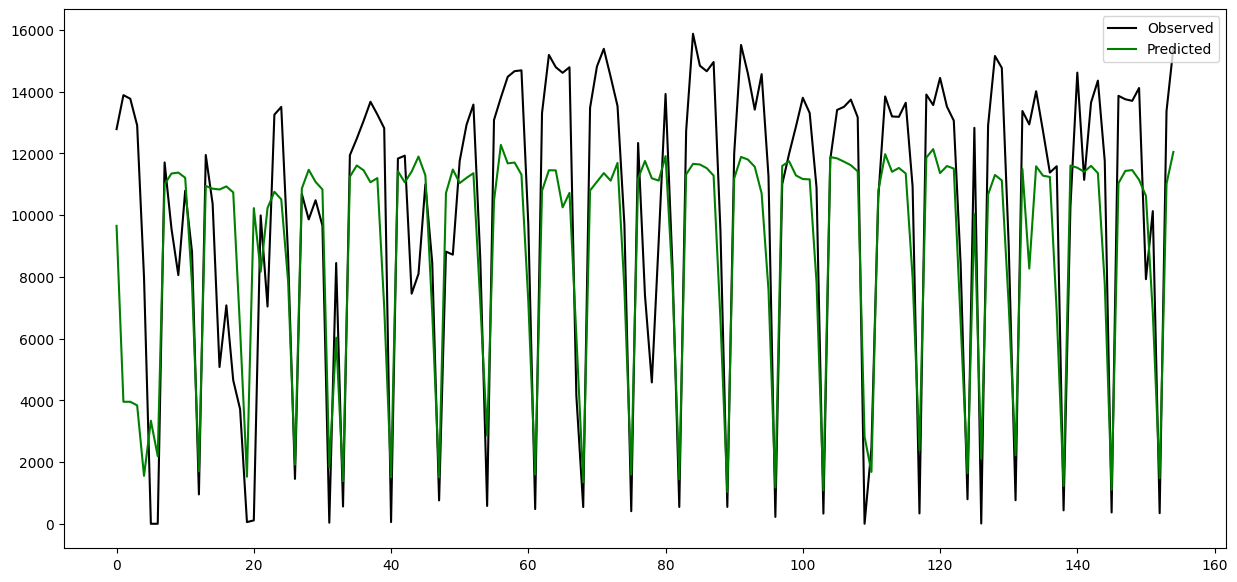

In [10]:

fig = plt.figure(figsize=(15,7))
plt.plot(XX_elect_test.index, YY_elect_test, label='Observed', color='k')
plt.plot(XX_elect_test.index, y_lr, label='Predicted', color='g')
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Energy vs Predicted Elec.: vs ')

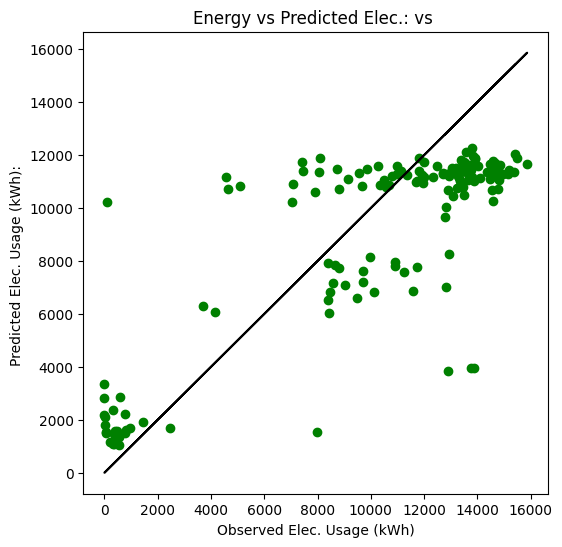

In [11]:
fig = plt.figure(figsize=(6,6))
plt.plot(YY_elect_test, YY_elect_test, c='k')
plt.scatter(YY_elect_test, y_lr, c='g')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): ")
plt.title("Energy vs Predicted Elec.: vs ")

In [12]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Attention, Input
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime

energy = pd.read_excel('/content/Prediction-of-Energy-Consumption/dailyEnergyWithFeatures.xlsx')
# save to file

energy['weekday'] = energy['TimeReviewed'].dt.dayofweek
energy['day_type'] = np.zeros(len(energy))
energy['day_type'][(energy['weekday']==5)|(energy['weekday']==6)|(energy['TimeReviewed']=='2017-12-26')|(energy['TimeReviewed']=='2018-1-1')|(energy['TimeReviewed']=='2018-1-14')|(energy['TimeReviewed']=='2018-1-26')|(energy['TimeReviewed']=='2018-5-1')|(energy['TimeReviewed']=='2018-8-15')|(energy['TimeReviewed']=='2018-10-2')|(energy['TimeReviewed']=='2018-12-25')|(energy['TimeReviewed']=='2019-1-1')|(energy['TimeReviewed']=='2019-1-14')|(energy['TimeReviewed']=='2019-1-26')|(energy['TimeReviewed']=='2019-5-1')]=1

energy.to_excel('/content/Prediction-of-Energy-Consumption/energy.xlsx')
energy

<ipython-input-13-5ccd334d1086>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy['day_type'][(energy['weekday']==5)|(energy['weekday']==6)|(energy['TimeReviewed']=='2017-12-26')|(energy['TimeReviewed']=='2018-1-1')|(energy['TimeReviewed']=='2018-1-14')|(energy['TimeReviewed']=='2018-1-26')|(energy['TimeReviewed']=='2018-5-1')|(energy['TimeReviewed']=='2018-8-15')|(energy['TimeReviewed']=='2018-10-2')|(energy['TimeReviewed']=='2018-12-25')|(energy['TimeReviewed']=='2019-1-1')|(energy['TimeReviewed']=='2019-1-14')|(energy['TimeReviewed']=='2019-1-26')|(energy['TimeReviewed']=='2019-5-1')]=1


,TimeReviewed,Solar_Power_Consumption(Kw),Temp( C),EmployeeCount,weekday,day_type
0,2017-12-26,12782.411988,25.000000,121,1,1.0
1,2017-12-27,13883.010020,25.375000,0,2,0.0
2,2017-12-28,13766.083029,24.833333,0,3,0.0
3,2017-12-29,12904.092990,24.833333,0,4,0.0
4,2017-12-30,7985.972000,25.906250,0,5,1.0
...,...,...,...,...,...,...
500,2019-05-10,15619.215017,27.041667,184,4,0.0
501,2019-05-11,9179.519970,26.662921,166,5,1.0
502,2019-05-12,0.000000,29.000000,11,6,1.0
503,2019-05-13,12396.665989,27.169492,186,0,0.0


In [14]:
from sklearn.preprocessing import LabelEncoder

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = pd.read_excel('/content/Prediction-of-Energy-Consumption/energy.xlsx', header=0, index_col=0)
values = dataset[['Solar_Power_Consumption(Kw)','Temp( C)','EmployeeCount','weekday','day_type']].values
len(values)
#values = values.reshape((len(values), 7))
# ensure all data is float
#values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
#drop the values you dont want to predict
#reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

reframed

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)  \
1   0.714262   0.062762   0.521552   0.166667        1.0  0.775761  0.112971   
2   0.775761   0.112971   0.000000   0.333333        0.0  0.769228  0.040446   
3   0.769228   0.040446   0.000000   0.500000        0.0  0.721061  0.040446   
4   0.721061   0.040446   0.000000   0.666667        0.0  0.446244  0.184100   
5   0.446244   0.184100   0.000000   0.833333        1.0  0.000000  0.108787   

   var3(t)   var4(t)  var5(t)  
1    0.000  0.333333      0.0  
2    0.000  0.500000      0.0  
3    0.000  0.666667      0.0  
4    0.000  0.833333      1.0  
5    0.125  1.000000      1.0  


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.714262,0.062762,0.521552,0.166667,1.0,0.775761,0.112971,0.000000,0.333333,0.0
2,0.775761,0.112971,0.000000,0.333333,0.0,0.769228,0.040446,0.000000,0.500000,0.0
3,0.769228,0.040446,0.000000,0.500000,0.0,0.721061,0.040446,0.000000,0.666667,0.0
4,0.721061,0.040446,0.000000,0.666667,0.0,0.446244,0.184100,0.000000,0.833333,1.0
5,0.446244,0.184100,0.000000,0.833333,1.0,0.000000,0.108787,0.125000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
500,0.739638,0.304045,0.818966,0.500000,0.0,0.872778,0.336123,0.793103,0.666667,0.0
501,0.872778,0.336123,0.793103,0.666667,0.0,0.512937,0.285412,0.715517,0.833333,1.0
502,0.512937,0.285412,0.715517,0.833333,1.0,0.000000,0.598326,0.047414,1.000000,1.0
503,0.000000,0.598326,0.047414,1.000000,1.0,0.692707,0.353237,0.801724,0.000000,0.0


In [15]:
values = reframed.values

n_train_time = 365 #training size is taken for 1 year (2017/26/12 to 2018/26/12)
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [16]:
from tensorflow.keras.models import Model

In [17]:
def attention_block(inputs):
    attention = Attention()([inputs, inputs])
    return attention

inputs = Input(shape=(train_X.shape[1], train_X.shape[2]))
lstm1 = LSTM(100, return_sequences=True)(inputs)
attention1 = attention_block(lstm1)

lstm2 = LSTM(100, return_sequences=True)(attention1)
attention2 = attention_block(lstm2)

lstm3 = LSTM(100)(attention2)
dropout = Dropout(0.2)(lstm3)

output = Dense(1)(dropout)

model = Model(inputs=inputs, outputs=output)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_X, train_y, epochs=25, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

In [19]:
score = model.evaluate(test_X, test_y, batch_size=70, verbose=1)

print('Test accuracy:', score[1])
print('Accuracy:',score[1]*100)

2/2 [==============================] - 0s 11ms/step - loss: 0.0505 - accuracy: 0.9712
Test accuracy: 0.971222996711731
Accuracy: 97.1222996711731


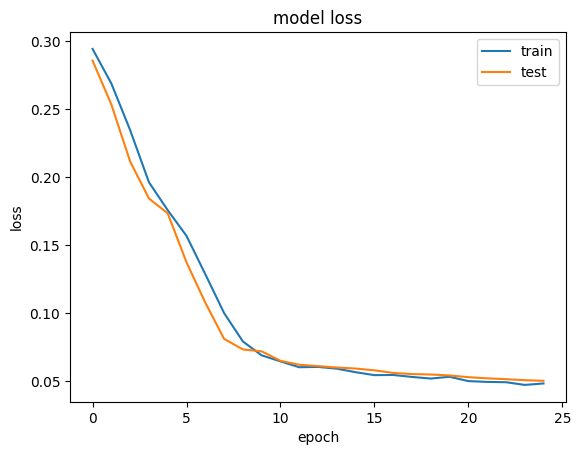

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [21]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0],9))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

5/5 [==============================] - 1s 4ms/step
Test RMSE: 4020.939


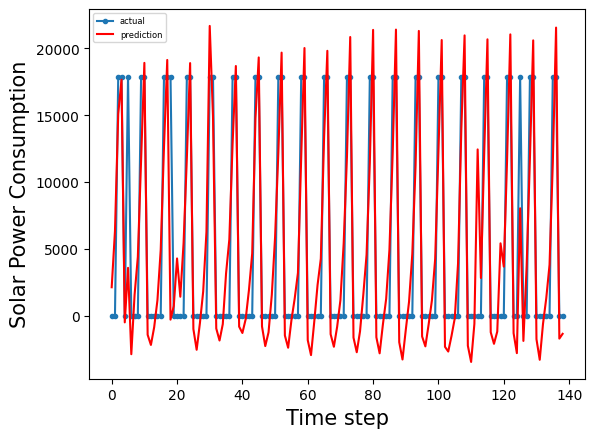

In [22]:
aa=[x for x in range(139)]
plt.plot(aa, inv_y[:139], marker='.', label="actual")
plt.plot(aa, inv_yhat[:139], 'r', label="prediction")
plt.ylabel('Solar Power Consumption', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=6)
plt.show()

In [25]:
n = int(input("Enter the day for which the value is to be predicted:"))
change=100*abs(inv_yhat[n]-inv_y[n])/inv_yhat[n]
print("The value of the consumption the next day will be",inv_yhat[n],"and the percentage change is ",change,"%")

Enter the day for which the value is to be predicted:80
The value of the consumption the next day will be 21387.580108721286 and the percentage change is  16.325349107874224 %
